In [1]:
import math
import numpy as np
import scipy.stats as si
from scipy.stats import norm
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import warnings

In [2]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# Black-Scholes Model

#### Session 5 Slide 14

https://quantpie.co.uk/bsm_bin_c_formula/bs_bin_c_summary.php

https://prateek964.medium.com/digital-options-e9d1739bb016



In [3]:
def BlackScholesCall(S0:int, 
                     K:int, 
                     r:int, 
                     sigma:int, 
                     T:int):
    
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
    return value

In [4]:
def BlackScholesPut(S0:int, 
                     K:int, 
                     r:int, 
                     sigma:int, 
                     T:int):
    
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
    
    return value

In [5]:
def BlackScholes_Digital_Cash_Nothing_Call(cash:int, 
                                           S0:int, 
                                           K:int, 
                                           r:int, 
                                           sigma:int, 
                                           T:int):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    value = cash*np.exp(-r*T)*norm.cdf(d2)
    
    return value

In [6]:
def BlackScholes_Digital_Cash_Nothing_Put(cash:int, 
                                           S0:int, 
                                           K:int, 
                                           r:int, 
                                           sigma:int, 
                                           T:int):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is exactly the same as the digital cash call other than the sign on d2
    value = cash*np.exp(-r*T)*norm.cdf(-d2)
    
    return value

In [7]:
def BlackScholes_Digital_Asset_Nothing_Call(S0:int, 
                                            K:int, 
                                            r:int, 
                                            sigma:int, 
                                            T:int):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is the first part of the vanilla BS call. When cash=K, the Asset or nothing call is equal to the cash or nothing call + vanilla call
    value = S0*norm.cdf(d1)
    
    return value

In [8]:
def BlackScholes_Digital_Asset_Nothing_Put(S0:int, 
                                            K:int, 
                                            r:int, 
                                            sigma:int, 
                                            T:int):
    
    # This is the same d1 and d2 as the vanilla BS
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma*np.sqrt(T)
    
    # This is the second part of the vanilla BS put. When cash=K, the Asset or nothing put is equal to the cash or nothing put - vanilla put
    value = S0*norm.cdf(-d1)
    
    return value

# Bachelier model

#### Session 5 Slide 7-8

In [9]:
def BachelierCall(S0:int, 
                  K:int, 
                  r:int, 
                  sigma:int, 
                  T:int):
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is the last line in slide 8, remember to flip the sign of x
    value = \
        np.exp(-r*T)*((S0-K)*norm.cdf(-x) 
                      + sigma*np.sqrt(T)*norm.pdf(-x))
    
    return value

In [10]:
def BachelierPut(S0:int, 
                  K:int, 
                  r:int, 
                  sigma:int, 
                  T:int):
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is the last line in slide 8, but it is now strike minus spot price and we no longer flip x
    value = \
        np.exp(-r*T)*((K-S0)*norm.cdf(x) 
                      + sigma*np.sqrt(T)*norm.pdf(x))
    
    return value

In [11]:
def Bachelier_Digital_Cash_Nothing_Call(cash:int, 
                                        S0:int, 
                                        K:int, 
                                        r:int, 
                                        sigma:int, 
                                        T:int):
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    value = cash*np.exp(-r*T)*norm.cdf(-x)
    
    return value

In [12]:
def Bachelier_Digital_Cash_Nothing_Put(cash:int, 
                                       S0:int, 
                                       K:int, 
                                       r:int, 
                                       sigma:int, 
                                       T:int):
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    value = cash*np.exp(-r*T)*norm.cdf(x)
    
    return value

In [13]:
def Bachelier_Digital_Asset_Nothing_Call(S0:int, 
                                         K:int, 
                                         r:int, 
                                         sigma:int, 
                                         T:int):
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is similar to the vanilla BachelierCall call, just that we do not deduct K from S0
    value = np.exp(-r*T)*(S0*norm.cdf(-x) + sigma*np.sqrt(T)*norm.pdf(-x))
    
    return value

In [14]:
def Bachelier_Digital_Asset_Nothing_Put(S0:int, 
                                        K:int, 
                                        r:int, 
                                        sigma:int, 
                                        T:int):
    
    # This is the last line in slide 7 where we define x_star
    x = (K-S0)/(sigma*np.sqrt(T))
    
    # This is similar to the vanilla BachelierCall call, just that we do not deduct K from S0
    value = np.exp(-r*T)*(S0*norm.cdf(x) - sigma*np.sqrt(T)*norm.pdf(x))
    
    return value

# Black model

#### Session 5 Slide 15-16

https://analystprep.com/study-notes/cfa-level-2/describe-how-the-black-model-is-used-to-value-european-options-on-futures/

https://www.investopedia.com/terms/b/blacksmodel.asp




In [15]:
def BlackCall(F0:int, 
              K:int, 
              r:int, 
              sigma:int, 
              T:int):
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma * np.sqrt(T)
    
    # Last line in slide 16
    value = np.exp(-r*T) * (F0 * norm.cdf(d1) - K * norm.cdf(d2))
    
    return value

In [16]:
def BlackPut(F0:int, 
              K:int, 
              r:int, 
              sigma:int, 
              T:int):
    
    # Refer to last line in slide 16. This is NOT the same d1 used in BlackScholes
    d1 = (np.log(F0/K) + 0.5 * (sigma**2) * T) / (sigma*np.sqrt(T))
    
    d2 = d1 - sigma * np.sqrt(T)
    
    # Last line in slide 16, but order is flipped, just like BlackScholes put
    value = np.exp(-r*T) * (K * norm.cdf(-d2) - F0 * norm.cdf(-d1))
    
    return value

# Displaced-diffusion model

#### Session 6 Slide 11-14

# Try Creating charts

In [17]:
# Use this ONLY if the options model parameters are S/F,K,r,sigma,T

def OptionsModel(model):
    # Initial parameters
    S_init = 100
    K_init = 100
    r_init = 0.05
    sigma_init = 0.2
    T_init = 1

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S
    S_range = np.linspace(50, 150, 100)
    prices = [model(S, K_init, r_init, sigma_init, T_init) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([50, 150])
    ax.set_ylim([0, max(prices) * 1.1])
    ax.set_xlabel('Initial Underlying Price')
    ax.set_ylabel('Option Price')
    ax.set_title(f"{model.__name__} Option Price")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S_init)

    rf_slider_ax = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r_init)

    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T_init)

    strike_slider_ax = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K_init)

    sigma_slider_ax = fig.add_axes([0.25, 0.10, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma_init)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        K_current = strike_slider.val
        r_current = rf_slider.val
        sigma_current = sigma_slider.val
        T_current = time_slider.val

        prices = [model(S, K_current, r_current, sigma_current, T_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([0, max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

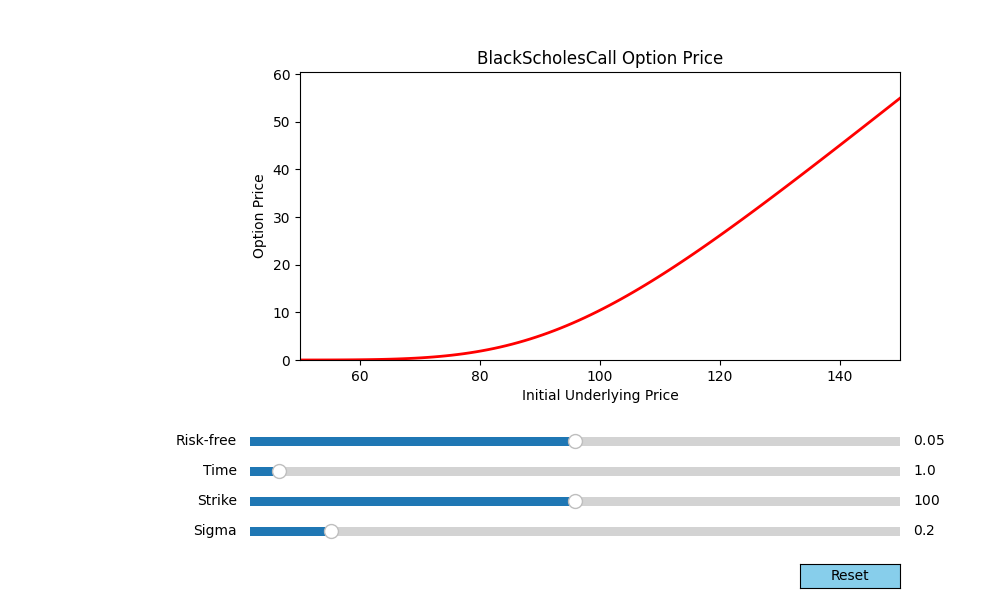

In [18]:
OptionsModel(BlackScholesCall)

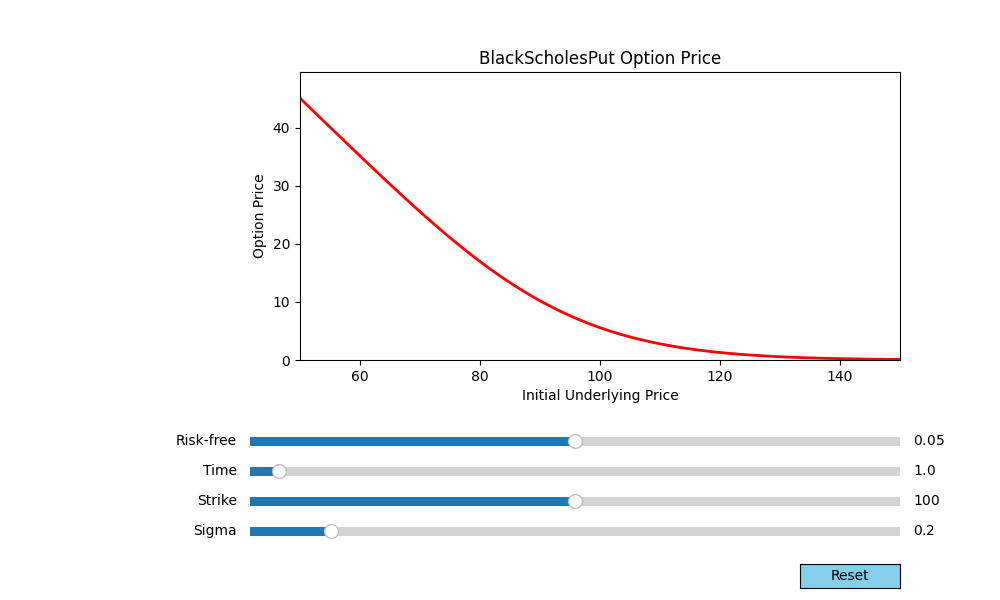

In [19]:
OptionsModel(BlackScholesPut)

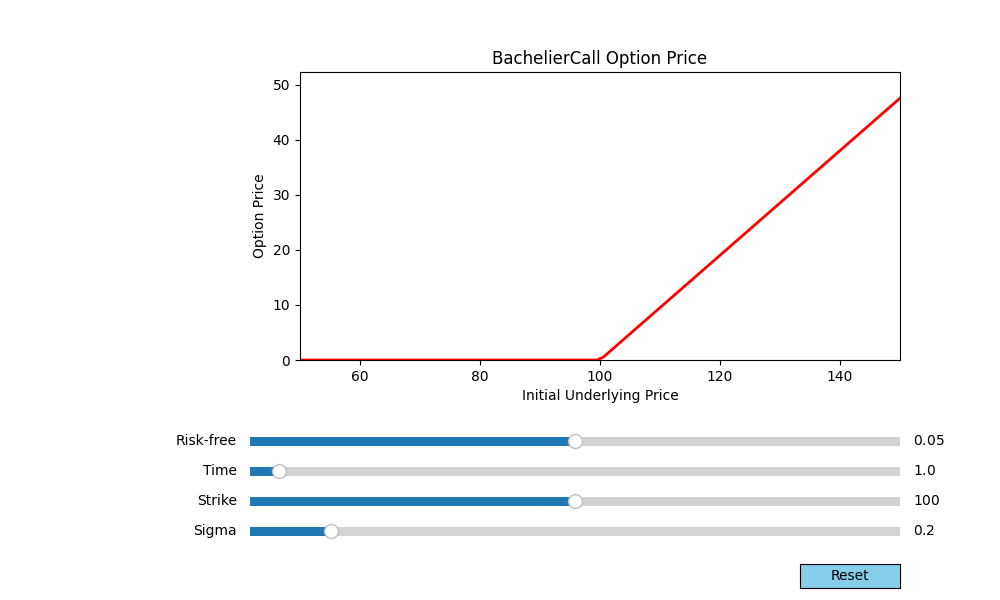

In [20]:
OptionsModel(BachelierCall)

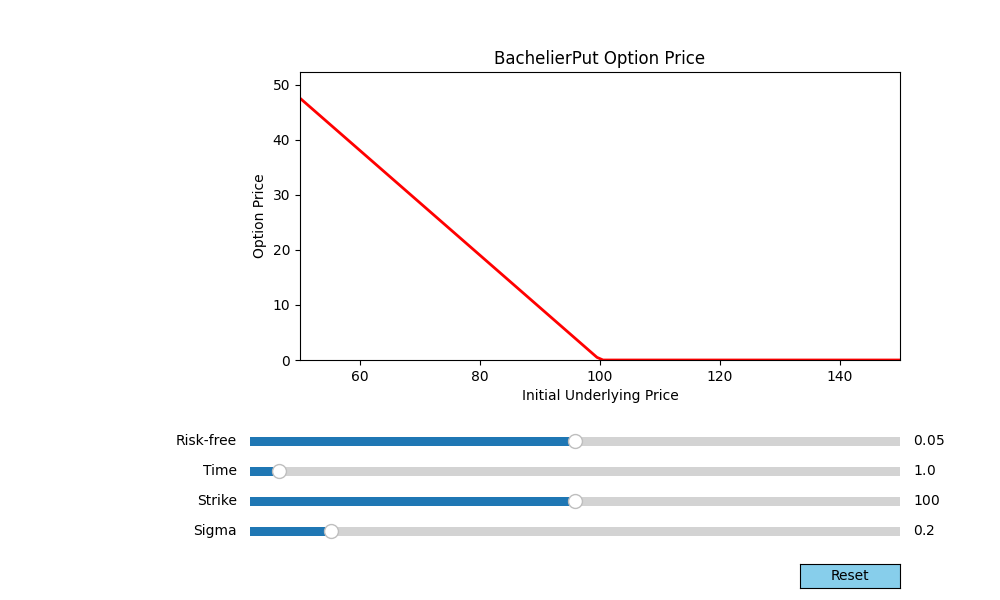

In [21]:
OptionsModel(BachelierPut)

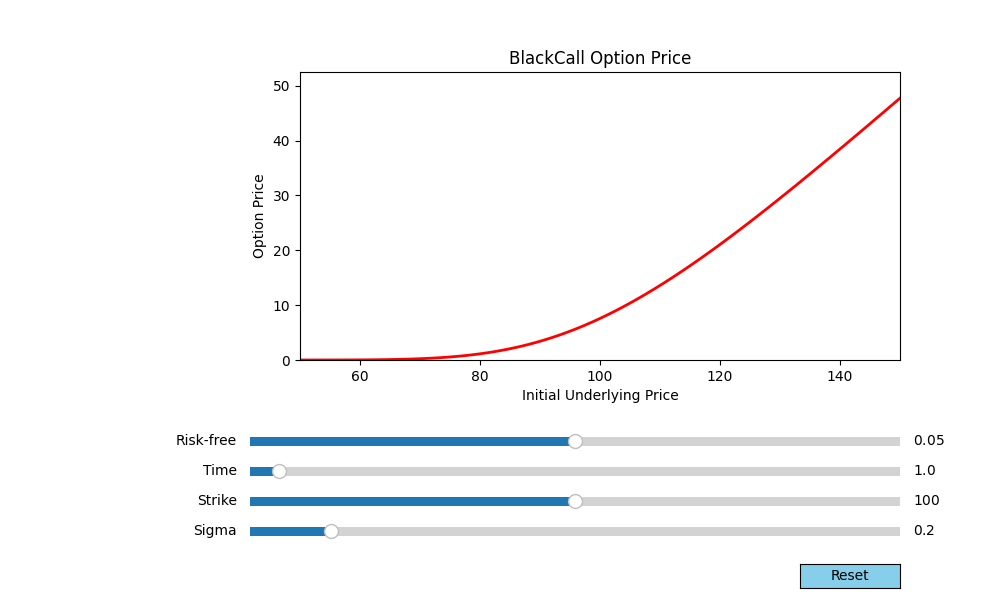

In [22]:
OptionsModel(BlackCall)

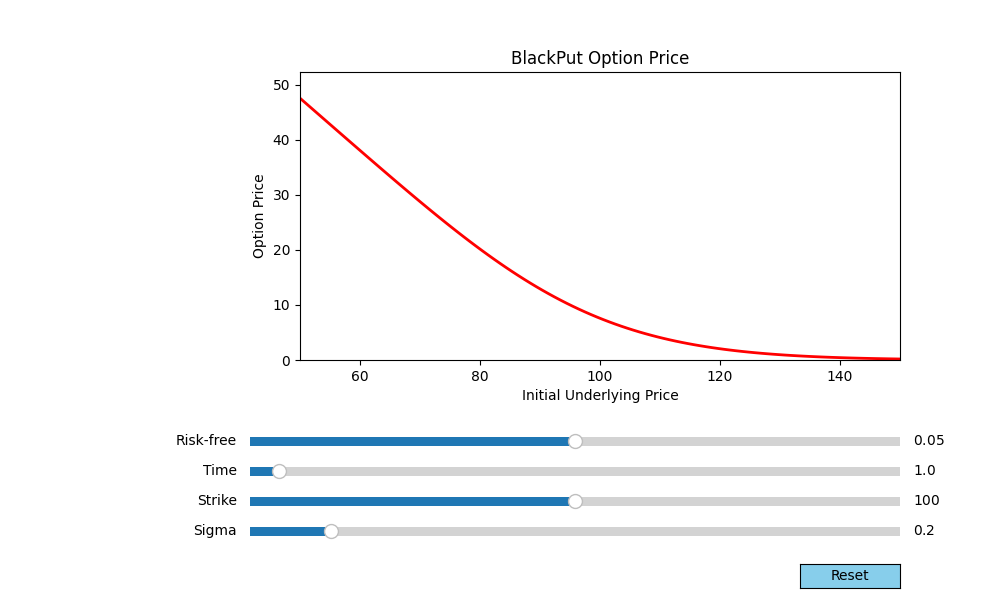

In [23]:
OptionsModel(BlackPut)

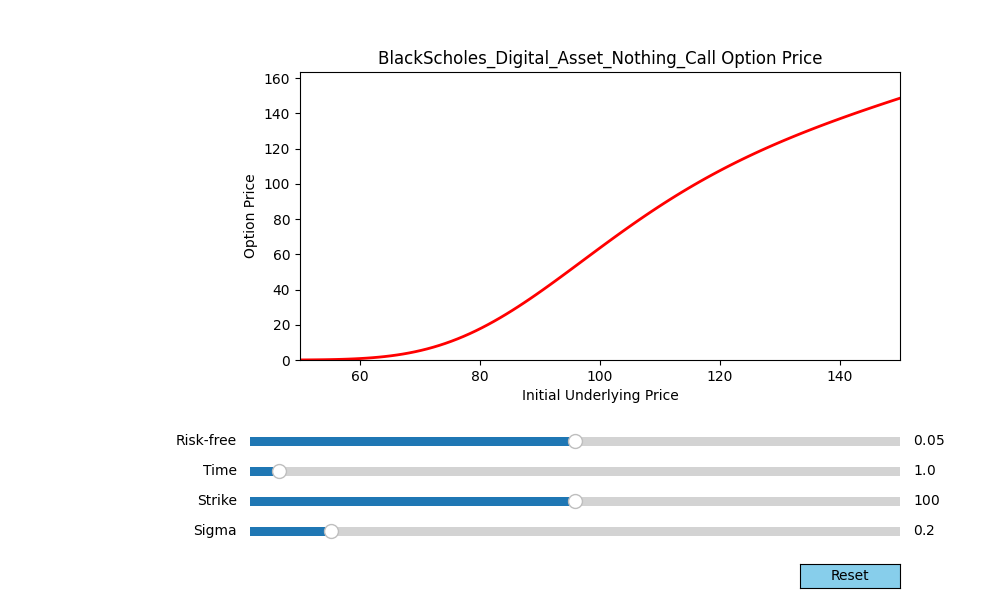

In [24]:
OptionsModel(BlackScholes_Digital_Asset_Nothing_Call)

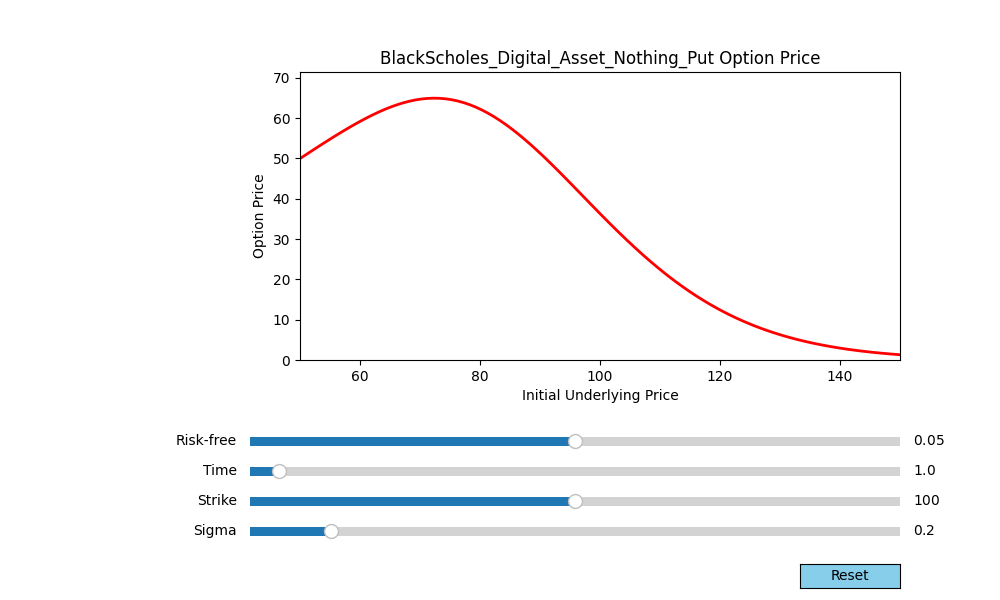

In [25]:
OptionsModel(BlackScholes_Digital_Asset_Nothing_Put)

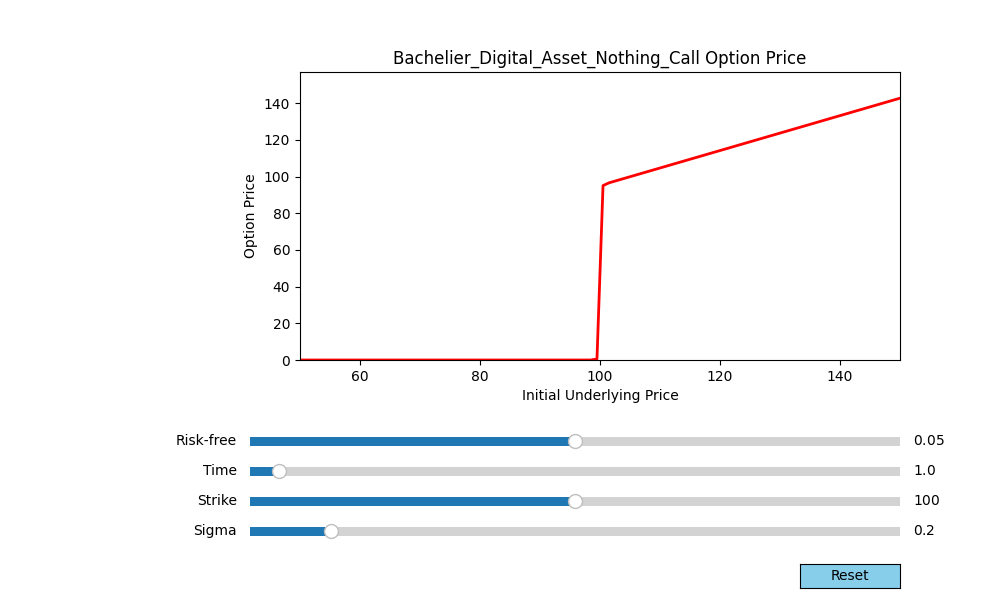

In [26]:
OptionsModel(Bachelier_Digital_Asset_Nothing_Call)

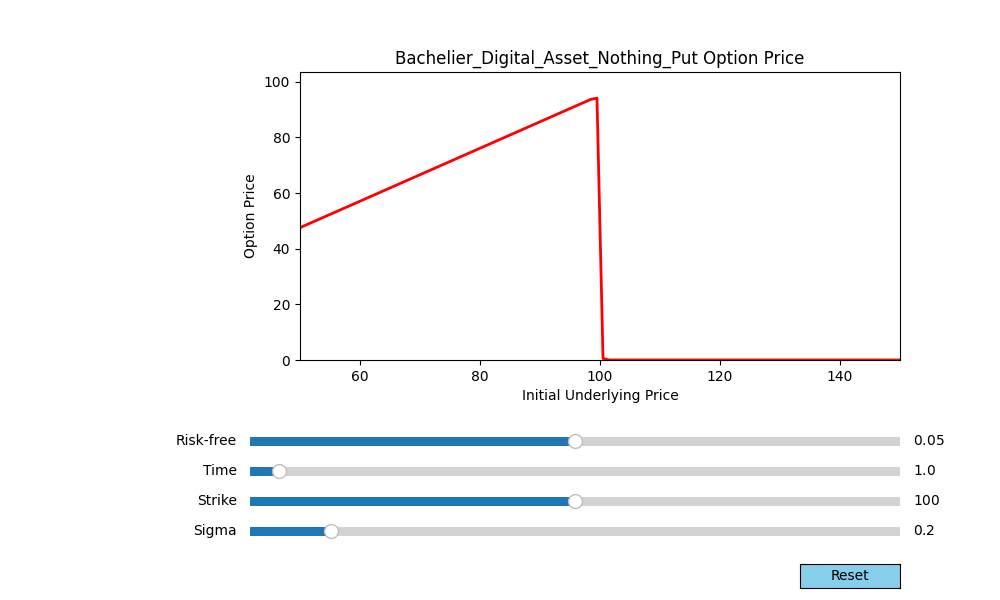

In [27]:
OptionsModel(Bachelier_Digital_Asset_Nothing_Put)